In [1]:
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pydataset

import wrangle
import env
import split_scale

In [2]:
df = wrangle.wrangle_telco()

In [3]:
df.head()

,monthly_charges,tenure,Two year,total_charges
1793,90.45,65,1,5879.25
1794,45.20,54,1,2440.80
1795,45.05,56,1,2522.80
1796,39.40,20,1,788.00
1797,85.15,72,1,6130.80


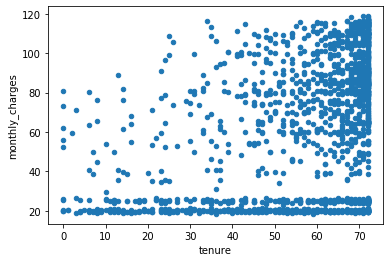

In [4]:
df.plot.scatter(y='monthly_charges', x='tenure')

In [5]:
train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

train.shape, test.shape, validate.shape

((1312, 4), (204, 4), (179, 4))

In [6]:
scaler = sklearn.preprocessing.MinMaxScaler()


In [7]:
scaler.fit(train[['monthly_charges', 'tenure', 'total_charges']])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
train[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(train[['monthly_charges', 'tenure', 'total_charges']])
test[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(test[['monthly_charges', 'tenure', 'total_charges']])
validate[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(validate[['monthly_charges', 'tenure', 'total_charges']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [9]:
train.head()

,monthly_charges,tenure,Two year,total_charges
6877,0.005486,0.222222,1,0.035627
6768,0.066833,0.902778,1,0.191707
5409,0.854364,0.861111,1,0.758025
1935,0.665337,0.763889,1,0.549974
2344,0.605486,0.986111,1,0.659910


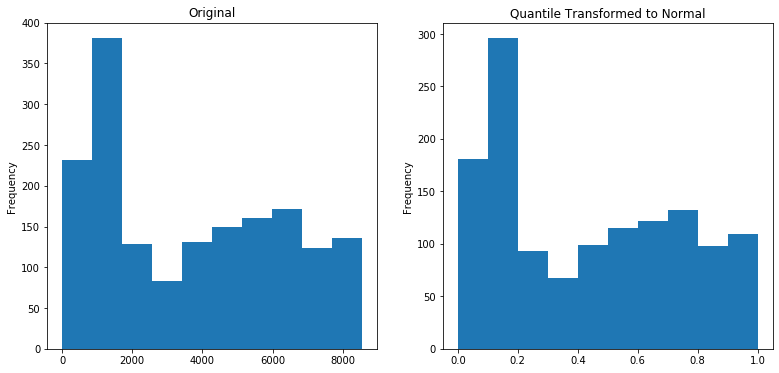

In [10]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
df.total_charges.plot.hist(title='Original')
plt.subplot(122)
train.total_charges.plot.hist(title='Quantile Transformed to Normal')

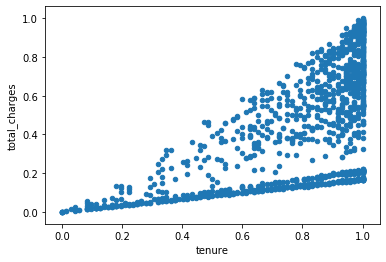

In [11]:
train.plot.scatter(y='total_charges', x='tenure')

In [12]:
df.tenure.head()

1793    65
1794    54
1795    56
1796    20
1797    72
Name: tenure, dtype: int64

In [13]:
train, validate, test = split_scale.split_my_data(df)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [14]:
scaler = split_scale.standard_scaler(train)

In [15]:
print("Mean:") 
print(scaler.mean_)

Mean:
[0.42197023 0.78664888 1.         0.43534808]


In [16]:
train_scaled, test_scaled = split_scale.uniform_scaler(train, test)

In [17]:
train_scaled

,monthly_charges,tenure,Two year,total_charges
6877,0.006841,0.057239,0.0,0.041615
6768,0.318182,0.510101,0.0,0.347801
5409,0.848282,0.444444,0.0,0.810953
1935,0.689899,0.333333,0.0,0.604130
2344,0.605802,0.752525,0.0,0.699500
...,...,...,...,...
6735,0.202020,0.121651,0.0,0.097096
6702,0.272727,0.212121,0.0,0.204614
7012,0.138560,0.323232,0.0,0.199064
6676,0.290404,1.000000,0.0,0.389806


In [18]:
test_scaled

,monthly_charges,tenure,Two year,total_charges
2045,0.511223,1.000000,0.0,0.603349
5092,0.790346,0.752525,0.0,0.841706
2265,0.411197,0.444444,0.0,0.452895
5489,0.789243,0.257576,0.0,0.590064
5370,0.859504,0.555556,0.0,0.862035
...,...,...,...,...
5265,0.716728,0.686869,0.0,0.773079
5445,0.972540,1.000000,0.0,0.984558
1908,0.519244,0.323232,0.0,0.497923
1975,0.762894,0.510101,0.0,0.741395


In [19]:
train_scaled, test_scaled = split_scale.gaussian_scaler(train, test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [20]:
train_scaled

,monthly_charges,tenure,Two year,total_charges
6877,0.005475,0.376893,4.272341,0.034864
6768,0.065203,6.811938,4.272341,0.171837
5409,0.666066,5.978518,4.272341,0.528540
1935,0.542834,4.348287,4.272341,0.416520
2344,0.501609,8.759732,4.272341,0.477874
...,...,...,...,...
6735,0.020292,1.185509,4.272341,0.071247
6702,0.059016,2.650800,4.272341,0.119870
7012,0.015864,4.147747,4.272341,0.117819
6676,0.061875,9.124168,4.272341,0.185951


In [21]:
test_scaled

,monthly_charges,tenure,Two year,total_charges
2045,0.399558,9.124168,4.272341,0.416239
5092,0.613322,8.759732,4.272341,0.548587
2265,0.272710,5.978518,4.272341,0.293111
5489,0.611705,3.092469,4.272341,0.409887
5370,0.672300,7.417693,4.272341,0.562127
...,...,...,...,...
5265,0.562358,8.407170,4.272341,0.511282
5445,0.733285,9.124168,4.272341,0.628437
1908,0.404778,4.147747,4.272341,0.334424
1975,0.585917,6.811938,4.272341,0.498613


In [22]:
train_scaled, test_scaled = split_scale.min_max_scaler(train, test)

In [23]:
train_scaled

,monthly_charges,tenure,Two year,total_charges
6877,0.005486,0.222222,0.0,0.035627
6768,0.066833,0.902778,0.0,0.191707
5409,0.854364,0.861111,0.0,0.758025
1935,0.665337,0.763889,0.0,0.549974
2344,0.605486,0.986111,0.0,0.659910
...,...,...,...,...
6735,0.020449,0.430556,0.0,0.074491
6702,0.060349,0.625000,0.0,0.129283
7012,0.015960,0.750000,0.0,0.126904
6676,0.063342,1.000000,0.0,0.209391


In [24]:
test_scaled

,monthly_charges,tenure,Two year,total_charges
2045,0.464339,1.000000,0.0,0.549492
5092,0.771571,0.986111,0.0,0.798817
2265,0.302244,0.861111,0.0,0.354789
5489,0.769077,0.666667,0.0,0.538635
5370,0.864339,0.930556,0.0,0.827029
...,...,...,...,...
5265,0.694264,0.972222,0.0,0.723820
5445,0.964090,1.000000,0.0,0.973350
1908,0.471322,0.750000,0.0,0.416561
1975,0.729676,0.902778,0.0,0.699233
